## 2.Time Series Investigation of Bitcoin Price


### 2.1 Obtain Time Series Data 

In [2]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from fredapi import Fred

### load the Fred API

In [4]:
fred = Fred(api_key = '86e8383eda5605a29fa51aa2791ca536')

###  get the price of bitcoin, gold and market

In [15]:
bitcoinprice= fred.get_series('CBBTCUSD')
bitcoinprice

2014-12-01      370.00
2014-12-02      378.00
2014-12-03      378.00
2014-12-04      377.10
2014-12-05         NaN
                ...   
2022-04-24    39489.71
2022-04-25    40490.41
2022-04-26    38102.78
2022-04-27    39188.42
2022-04-28    39737.71
Length: 2706, dtype: float64

<AxesSubplot:>

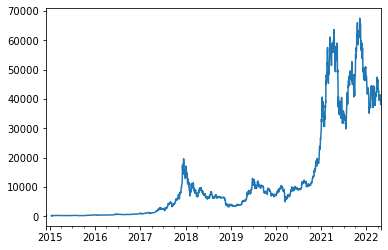

In [16]:
bitcoinprice.plot()

In [17]:
 goldprice = fred.get_series('ID7108')
 goldprice

2001-12-01    100.0
2002-01-01     99.8
2002-02-01    101.8
2002-03-01    106.8
2002-04-01    106.4
              ...  
2021-11-01    649.7
2021-12-01    648.0
2022-01-01    655.7
2022-02-01    654.8
2022-03-01    699.4
Length: 244, dtype: float64

<AxesSubplot:>

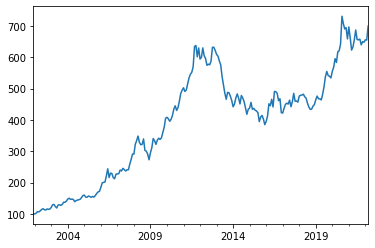

In [18]:
 goldprice.plot()

In [19]:
market = fred.get_series('SP500')
market

2012-04-30    1397.91
2012-05-01    1405.82
2012-05-02    1402.31
2012-05-03    1391.57
2012-05-04    1369.10
               ...   
2022-04-22    4271.78
2022-04-25    4296.12
2022-04-26    4175.20
2022-04-27    4183.96
2022-04-28    4287.50
Length: 2609, dtype: float64

<AxesSubplot:>

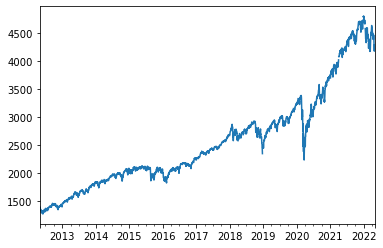

In [20]:
market.plot()

### 2.2 Data Transformations

### extract data from January 2016 

In [21]:
bp = bitcoinprice.loc['2016-01-01':]
gp = goldprice.loc['2016-01-01':]
mp = market.loc['2016-01-01':]

### Transform series 1 and 3 from daily to monthly data

In [22]:
monthly_bitcoinprice = bp.resample('MS').first()
monthly_market = mp.resample('MS').first()

### Transform monthly price observations into monthly returns

In [23]:
import numpy as np
rbt = np.log(monthly_bitcoinprice/monthly_bitcoinprice.shift(1))
rgt = np.log(gp/gp.shift(1))
rmt = np.log(monthly_market/monthly_market.shift(1))

In [18]:
rbt

2016-01-01         NaN
2016-02-01   -0.159771
2016-03-01    0.153831
2016-04-01   -0.036207
2016-05-01    0.089924
                ...   
2021-12-01   -0.063002
2022-01-01   -0.181097
2022-02-01   -0.208950
2022-03-01    0.136510
2022-04-01    0.039951
Freq: MS, Length: 76, dtype: float64

In [19]:
rgt

2016-01-01         NaN
2016-02-01    0.043108
2016-03-01    0.089917
2016-04-01   -0.012938
2016-05-01    0.044569
                ...   
2021-11-01    0.015824
2021-12-01   -0.002620
2022-01-01    0.011813
2022-02-01   -0.001374
2022-03-01    0.065893
Length: 75, dtype: float64

In [20]:
rmt

2016-01-01         NaN
2016-02-01   -0.037089
2016-03-01    0.019895
2016-04-01    0.046628
2016-05-01    0.004164
                ...   
2021-12-01   -0.022053
2022-01-01    0.060928
2022-02-01   -0.053532
2022-03-01   -0.054297
2022-04-01    0.054147
Freq: MS, Length: 76, dtype: float64

## 2.3 Data Analysis

### The correlation between rbt and rgt

In [26]:
rbt.corr(rgt)

0.14440618264111113

#### The correlation coefficient between the return of Bitcoinpric and return of goldprice is 0.144,  which means correlation between those two is weak, bitcoin price has Not much impact comming from gold price.

# The correlation between rbt and rgt

In [27]:
rbt.corr(rmt)

0.22492161569536684

#### The correlation coefficient between the return of Bitcoinpric and return of market is 0.224,  which means correlation between those two is weak, bitcoin price has Not much impact comming from market price.But market price have mo more impact than gold, to the bitcoin pricee.

In [27]:
import statsmodels.formula.api as smf

In [28]:
rbt1 = pd.DataFrame(rbt,columns=['rbt'])
rmt1 = pd.DataFrame(rmt,columns=['rmt'])
df1 = pd.concat([rbt1,rmt1],axis=1)

In [29]:
results_1 = smf.ols('rbt~rmt',data=df1).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    rbt   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.890
Date:                Fri, 29 Apr 2022   Prob (F-statistic):             0.0524
Time:                        07:04:17   Log-Likelihood:                 7.3871
No. Observations:                  75   AIC:                            -10.77
Df Residuals:                      73   BIC:                            -6.139
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0508      0.026      1.929      0.0

### In this model, the two parameter,alpha=0.0508, beta=1.0520, indicate that bitcoin is high-risk assets.

In [30]:
rgt1 = pd.DataFrame(rgt,columns=['rgt'])
df2 = pd.concat([rgt1,rmt1],axis=1)

In [31]:
results_2 = smf.ols('rgt~rmt',data=df2).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    rgt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.03040
Date:                Fri, 29 Apr 2022   Prob (F-statistic):              0.862
Time:                        07:07:31   Log-Likelihood:                 134.39
No. Observations:                  74   AIC:                            -264.8
Df Residuals:                      72   BIC:                            -260.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0079      0.005      1.664      0.1

### In this model, the two parameter,alpha=0.0079, beta=-0.0168, indicate that gold is low-risk assets.¶